In [1]:
%matplotlib ipympl
from geometry import *
from im_proc import *
from laser_calibration import *
import pickle

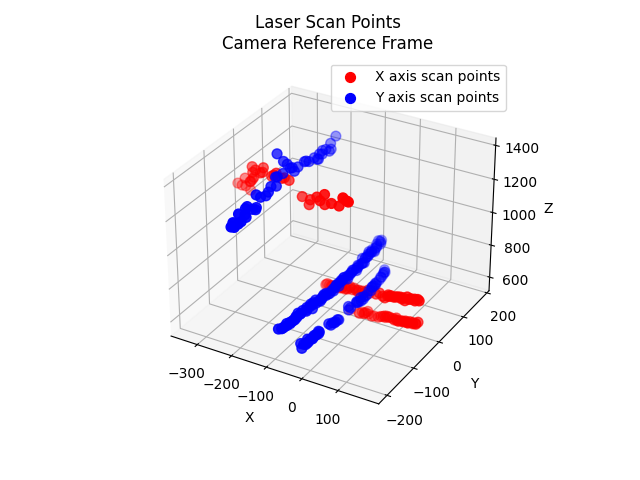


Sanity checks - Below numbers should all be ~90:
Angle between x and z axes: 90.0
Angle between y and z axes: 90.0
Angle between x and y axes: 90.0
Angle between tangent planes (should be close to 90 deg hopefully): 90.77227589897902


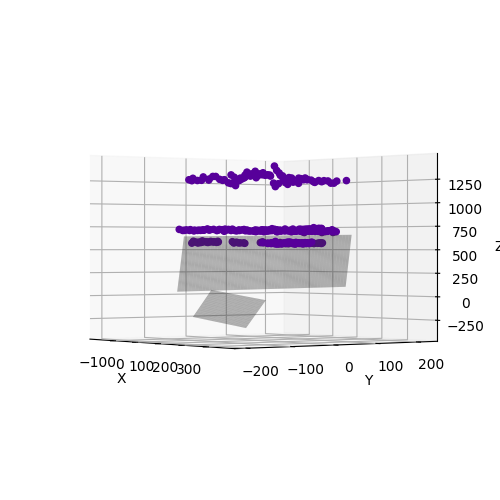

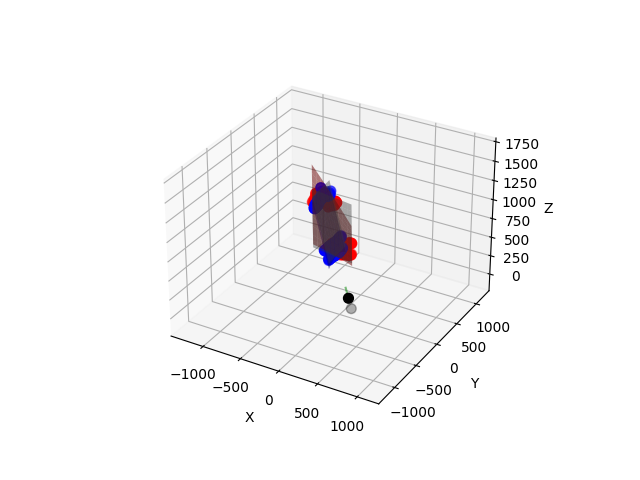

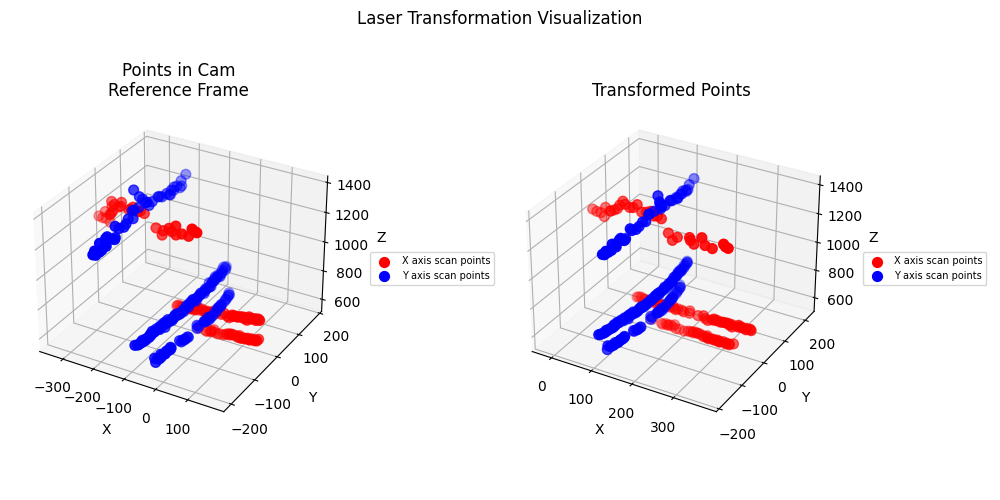

Laser basis matrix:
[[ 0.96562307  0.0033754  -0.2599244 ]
 [-0.01057962  0.99959752 -0.0263226 ]
 [ 0.25973094  0.02816761  0.96527013]]
Laser origin x translation relative to camera origin, laser basis: 123.33034375480042
Laser origin y translation relative to camera origin, laser basis: -4.469254521381378
Laser origin z translation relative to camera origin, laser basis: -42.00021976994901
Laser origin in camera basis: [129.99242157  -4.66668876  -8.63474013]


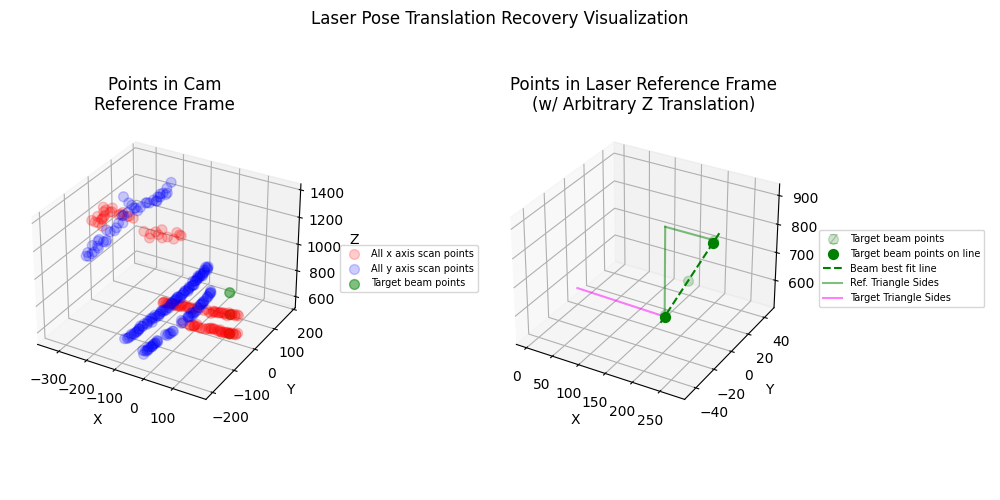

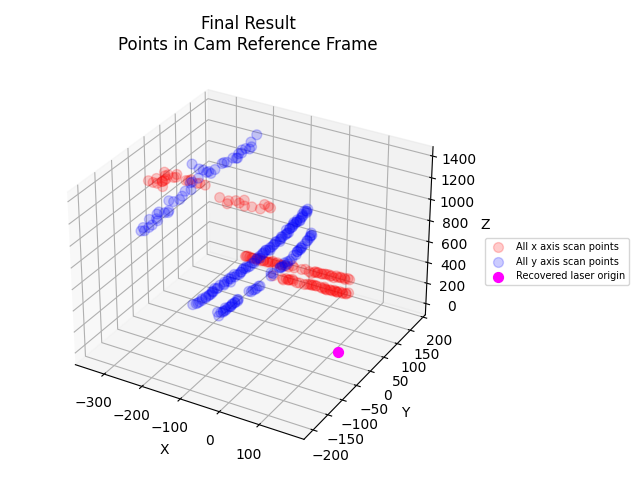

[[ 0.95376551 -0.04149034  0.29767414]
 [ 0.04072502  0.99913186  0.00877537]
 [-0.29777981  0.00375314  0.9546272 ]]
[[-241.63862923]
 [  -3.76589318]
 [  10.70619886]]
[[ 9.65623069e-01  3.37539668e-03 -2.59924402e-01  1.29992422e+02]
 [-1.05796196e-02  9.99597515e-01 -2.63226020e-02 -4.66668876e+00]
 [ 2.59730937e-01  2.81676130e-02  9.65270131e-01 -8.63474013e+00]]


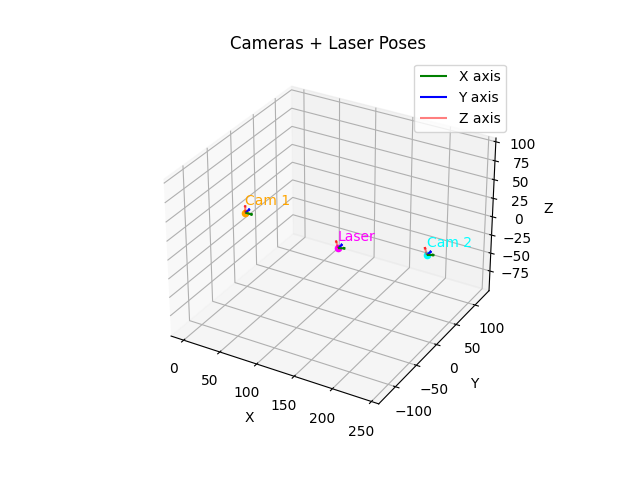

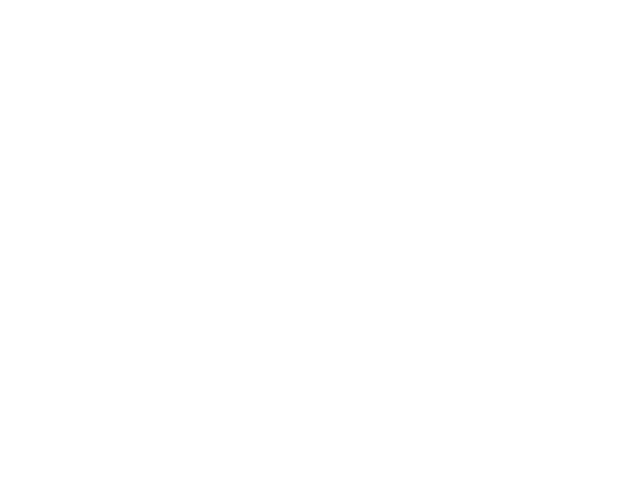

In [2]:
# recover pose
images_path = "pose_recovery_input/example/images" # path to laser pose recovery images captured with cam_data_collection.py/pose_recovery_collection
points_path = "pose_recovery_input/example/npys" # path to save 2D points of spot on board extrcted during get_laser_pose_recovery_points2d
stereo_params_path = "params/example_stereo_params.pkl" # stereo camera params path from stereocamera calibration
num_depths = 4 # number of checkerboard depths scanned on during image collection
laser_pose_path = "params/example_laser_params.pkl" # path to savethe receovered  laser pose params

#1) Extract 2D points of spot on board from all stereo images
get_laser_pose_recovery_points2d(images_path, stereo_params_path, num_depths, output_folder_path = points_path, manual_approve=True)

#2) Convert the 2D points to 3D
with open(stereo_params_path, "rb") as f:
    stereo_cam_params = pickle.load(f)
x_axis_scan_points3d, y_axis_scan_points3d, target_angle_points3d = get_laser_pose_recovery_points3d(stereo_cam_params, 4, input_folder_path = points_path, skip_planes=[0])

#3) Recover the laser rotation (basis) and visualize it
laser_B, intersection_line_points3d = recover_laser_basis(x_axis_scan_points3d, y_axis_scan_points3d)
laser_params = LaserPoseParams(laser_B)
visualize_transformation(x_axis_scan_points3d, y_axis_scan_points3d, laser_params)

# 4) Recover the laser translation
laser_pose_translation = recover_laser_translation(laser_B, intersection_line_points3d, target_angle_points3d, x_axis_scan_points3d, y_axis_scan_points3d, target_angle_axis = "x")
laser_params = LaserPoseParams(laser_B, laser_pose_translation)

# 5) Save the laser pose params, consisting or rotation and translation
with open(laser_pose_path, "wb") as f:
    pickle.dump(laser_params, f)

# 6) Visualize the recovered laser pose
visualize_poses(stereo_cam_params, laser_params)


In [3]:
with open(laser_pose_path, "rb") as f:
    laser_params = pickle.load(f)
print(laser_params.pose_R)
print(laser_params.pose_T)


[[ 0.96562307  0.0033754  -0.2599244 ]
 [-0.01057962  0.99959752 -0.0263226 ]
 [ 0.25973094  0.02816761  0.96527013]]
[129.99242157  -4.66668876  -8.63474013]
